<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_29_RNN_Code_Example_in_Keras/sentiment_analysis_simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import necessary libraries
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
from keras.utils import pad_sequences
import numpy as np

# integer_encoding_simple_rnn

In [39]:
# Sample documents
import numpy as np

docs = ['go pak',
                'pak pak',
                'hip hip hurray',
                'jeetega bhai jeetega PK jeetega',
                'pakistan zinda bad',
                'afridi afridi',
                'shoib shoib',
                'sarfraz sarfraz',
                'imran ji ki jai',
                'qaudi e azam zindabad']

In [40]:
# Initialize the tokenizer
tokenizer = Tokenizer(oov_token='<nothings>')

In [41]:
# Fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)

In [42]:
# Get the word index
tokenizer.word_index

{'<nothings>': 1,
 'pak': 2,
 'jeetega': 3,
 'hip': 4,
 'afridi': 5,
 'shoib': 6,
 'sarfraz': 7,
 'go': 8,
 'hurray': 9,
 'bhai': 10,
 'pk': 11,
 'pakistan': 12,
 'zinda': 13,
 'bad': 14,
 'imran': 15,
 'ji': 16,
 'ki': 17,
 'jai': 18,
 'qaudi': 19,
 'e': 20,
 'azam': 21,
 'zindabad': 22}

In [43]:
# Get the word counts
tokenizer.word_counts

OrderedDict([('go', 1),
             ('pak', 3),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('pk', 1),
             ('pakistan', 1),
             ('zinda', 1),
             ('bad', 1),
             ('afridi', 2),
             ('shoib', 2),
             ('sarfraz', 2),
             ('imran', 1),
             ('ji', 1),
             ('ki', 1),
             ('jai', 1),
             ('qaudi', 1),
             ('e', 1),
             ('azam', 1),
             ('zindabad', 1)])

In [44]:
# Get the document count
tokenizer.document_count

10

In [45]:
# Convert the documents to sequences of integers
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[8, 2],
 [2, 2],
 [4, 4, 9],
 [3, 10, 3, 11, 3],
 [12, 13, 14],
 [5, 5],
 [6, 6],
 [7, 7],
 [15, 16, 17, 18],
 [19, 20, 21, 22]]

In [46]:
# Pad the sequences to the same length
sequences = pad_sequences(sequences,padding='post')

In [47]:
# Display the padded sequences
sequences

array([[ 8,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4,  9,  0,  0],
       [ 3, 10,  3, 11,  3],
       [12, 13, 14,  0,  0],
       [ 5,  5,  0,  0,  0],
       [ 6,  6,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [15, 16, 17, 18,  0],
       [19, 20, 21, 22,  0]], dtype=int32)

In [59]:
# Create a Sequential model
model_1 = Sequential()
# Add an Embedding layer
model_1.add(Embedding(len(tokenizer.word_index) + 1,output_dim=2,input_length=sequences.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [60]:
# Compile the model
model_1.compile('adam','accuracy')

In [61]:
# Make predictions on the sequences
pred = model_1.predict(sequences)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[[ 0.01187364  0.01057414]
  [-0.01117843 -0.01070606]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]]

 [[-0.01117843 -0.01070606]
  [-0.01117843 -0.01070606]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]]

 [[-0.02633025 -0.00681285]
  [-0.02633025 -0.00681285]
  [ 0.04631424  0.04397286]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]]

 [[-0.0137799   0.00647547]
  [ 0.04482671 -0.00860756]
  [-0.0137799   0.00647547]
  [-0.00402069  0.01538659]
  [-0.0137799   0.00647547]]

 [[ 0.02552284  0.00771474]
  [ 0.01933109  0.01908933]
  [ 0.04789219  0.04365121]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]]

 [[ 0.01171206 -0.02031921]
  [ 0.01171206 -0.02031921]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.03634788]]

 [[ 0.04850223 -0.02977124]
  [ 0.04850223 -0.02977124]
  [-0.01158148 -0.03634788]
  [-0.01158148 -0.0363478

In [62]:
# Display the model summary
model_1.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (10, 5, 2)             │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

# imdb dataset

In [64]:
# Load the IMDB dataset
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

Exception ignored in: <function _xla_gc_callback at 0x7e99e3baa2a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [65]:
# Display the shape of the test data
x_test.shape

(25000,)

In [66]:
# Display the length of a single training example
len(x_train[3])

550

In [67]:
# Pad the training and test data to a maximum length of 50
x_train = pad_sequences (x_train,padding='post',maxlen=50)
x_test = pad_sequences(x_test,padding='post',maxlen=50)

In [68]:
# Display the shape of the training data
x_train.shape

(25000, 50)

In [69]:
# x_train[1]

In [70]:
# Create a Sequential model
model = Sequential()
# Add an Embedding layer
model.add(Embedding(10000, 2))
# Add a SimpleRNN layer
model.add(SimpleRNN(32, return_sequences=False))
# Add a Dense output layer
model.add(Dense(1, activation='sigmoid'))

In [71]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
# Re-compile the model (this is redundant)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
# Display the model summary (commented out)
# model.summary()

In [74]:
# Train the model on the training data
history = model.fit(x_train, y_train,epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.5310 - loss: 0.6824 - val_accuracy: 0.7772 - val_loss: 0.4732
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8191 - loss: 0.4102 - val_accuracy: 0.8046 - val_loss: 0.4289
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8681 - loss: 0.3218 - val_accuracy: 0.8054 - val_loss: 0.4389
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.8892 - loss: 0.2762 - val_accuracy: 0.8003 - val_loss: 0.4701
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9028 - loss: 0.2539 - val_accuracy: 0.7898 - val_loss: 0.5393


In [77]:
# Display the model summary
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 50, 2)          │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,461 (247.90 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,308 (165.27 KB)

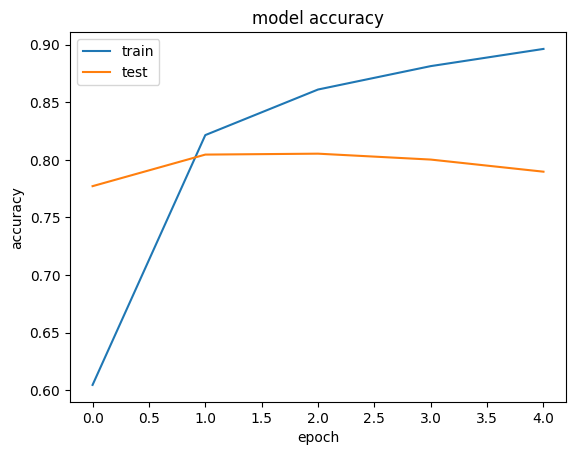

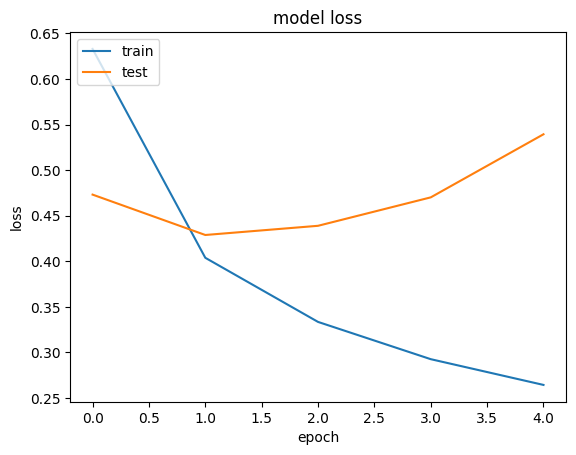

In [75]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()